In [1]:
!pip install tensorflow

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [54]:
DATADIR = "C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train"
CATEGORIES = ["A", "B", "C", "D", "del", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "nothing", "O", "P", "Q", "R", "S", "space", "T", "U", "V", "W", "X", "Y", "Z"]

In [55]:
os.path.join(DATADIR, CATEGORIES[0]), os.path.join(DATADIR, CATEGORIES[1])

('C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\\A',
 'C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\\B')

In [56]:
len(CATEGORIES)

29

In [57]:
for category in CATEGORIES:
    print(os.path.join(DATADIR, category))

C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\A
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\B
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\C
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\D
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\del
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\E
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\F
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\G
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\H
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\I
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\J
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\K
C:/Users/happy/Downloads/archive/asl_alphabet_train/asl_alphabet_train\L
C:/Users/happy/Downloads/archive/asl_alphabet_tra

In [58]:
os.listdir(os.path.join(DATADIR, CATEGORIES[0])), os.listdir(os.path.join(DATADIR, CATEGORIES[1]))

(['A1.jpg',
  'A10.jpg',
  'A100.jpg',
  'A1000.jpg',
  'A1001.jpg',
  'A1002.jpg',
  'A1003.jpg',
  'A1004.jpg',
  'A1005.jpg',
  'A1006.jpg',
  'A1007.jpg',
  'A1008.jpg',
  'A1009.jpg',
  'A101.jpg',
  'A1010.jpg',
  'A1011.jpg',
  'A1012.jpg',
  'A1013.jpg',
  'A1014.jpg',
  'A1015.jpg',
  'A1016.jpg',
  'A1017.jpg',
  'A1018.jpg',
  'A1019.jpg',
  'A102.jpg',
  'A1020.jpg',
  'A1021.jpg',
  'A1022.jpg',
  'A1023.jpg',
  'A1024.jpg',
  'A1025.jpg',
  'A1026.jpg',
  'A1027.jpg',
  'A1028.jpg',
  'A1029.jpg',
  'A103.jpg',
  'A1030.jpg',
  'A1031.jpg',
  'A1032.jpg',
  'A1033.jpg',
  'A1034.jpg',
  'A1035.jpg',
  'A1036.jpg',
  'A1037.jpg',
  'A1038.jpg',
  'A1039.jpg',
  'A104.jpg',
  'A1040.jpg',
  'A1041.jpg',
  'A1042.jpg',
  'A1043.jpg',
  'A1044.jpg',
  'A1045.jpg',
  'A1046.jpg',
  'A1047.jpg',
  'A1048.jpg',
  'A1049.jpg',
  'A105.jpg',
  'A1050.jpg',
  'A1051.jpg',
  'A1052.jpg',
  'A1053.jpg',
  'A1054.jpg',
  'A1055.jpg',
  'A1056.jpg',
  'A1057.jpg',
  'A1058.jpg',
  'A10

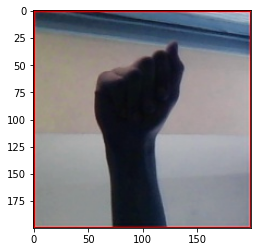

In [59]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [60]:
print(img_array)
print(len(img_array))

[[[252   2   1]
  [248   0   1]
  [249   0  10]
  ...
  [248   0   4]
  [252   4   3]
  [246   0   0]]

 [[249   1   1]
  [234   1   3]
  [209   6  15]
  ...
  [198   6  17]
  [210   2   4]
  [227  11   6]]

 [[241   0   0]
  [206   8  10]
  [144  32  39]
  ...
  [244 173 189]
  [255 165 174]
  [164   7  11]]

 ...

 [[254   3   5]
  [195   3   3]
  [213 135 129]
  ...
  [158 129 144]
  [224 125 135]
  [144   9  17]]

 [[251   0   0]
  [219   8   4]
  [255 124 120]
  ...
  [225 126 136]
  [253 114 118]
  [172  13  15]]

 [[251   1   0]
  [227   6   2]
  [173  10   7]
  ...
  [146  11  19]
  [172  13  17]
  [179   7   7]]]
200


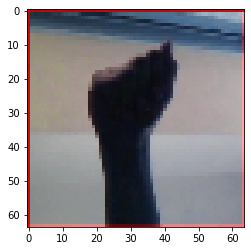

In [61]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)

In [62]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [63]:
print(len(training_data))
print(training_data[5])

87000
[array([[[225,   2,   5],
        [186,  17,  16],
        [181,  11,  22],
        ...,
        [184,   8,  15],
        [182,   9,  14],
        [215,  11,  18]],

       [[187,  13,  15],
        [ 85, 104, 137],
        [ 82, 111, 139],
        ...,
        [ 40,  60,  84],
        [101, 101, 119],
        [175,  95, 101]],

       [[180,  11,  20],
        [ 78, 105, 134],
        [ 65,  97, 117],
        ...,
        [ 95, 104, 116],
        [104, 102, 108],
        [178,  94,  98]],

       ...,

       [[199,  23,  18],
        [225, 225, 216],
        [220, 227, 216],
        ...,
        [164, 167, 177],
        [167, 172, 178],
        [250, 161, 168]],

       [[195,  22,  17],
        [228, 224, 217],
        [223, 223, 212],
        ...,
        [165, 165, 176],
        [166, 173, 177],
        [249, 164, 173]],

       [[218,  17,  17],
        [253, 215, 210],
        [254, 214, 210],
        ...,
        [237, 155, 159],
        [243, 163, 158],
        [255, 157

In [64]:
import random
random.shuffle(training_data)

In [65]:
print(training_data[2])

[array([[[230,   2,   1],
        [191,  13,  16],
        [186,  11,  11],
        ...,
        [189,  11,  13],
        [191,  13,  15],
        [216,  12,  16]],

       [[191,  13,  11],
        [103, 111,  94],
        [ 99, 109,  94],
        ...,
        [ 53,  53,  58],
        [ 60,  50,  53],
        [125,  46,  48]],

       [[195,  20,   8],
        [148, 154, 126],
        [147, 149, 121],
        ...,
        [ 57,  60,  69],
        [ 62,  58,  65],
        [127,  46,  49]],

       ...,

       [[188,   8,   7],
        [ 43,  33,  25],
        [ 49,  36,  30],
        ...,
        [ 54,  80, 119],
        [ 73,  93, 126],
        [177, 103, 122]],

       [[192,  11,   6],
        [ 56,  43,  43],
        [ 55,  41,  39],
        ...,
        [ 41,  65,  95],
        [ 70,  79, 107],
        [153,  85, 105]],

       [[210,   4,   1],
        [ 91,   7,  10],
        [ 93,   7,   9],
        ...,
        [112,  51,  68],
        [124,  56,  76],
        [181,  57,  75]

In [66]:
for sample in training_data[:5]:
    print(sample[1])

3
18
4
13
7


In [67]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)

In [68]:
X = np.array(X)
y = np.array(y)

In [69]:
X.shape, y.shape

((87000, 64, 64, 3), (87000,))

In [70]:
X[:2], y[:2]

(array([[[[225,   1,   2],
          [174,  16,  22],
          [178,  14,  18],
          ...,
          [184,   7,  12],
          [186,  11,  19],
          [212,  11,  14]],
 
         [[184,  14,  14],
          [ 78, 119, 131],
          [ 78, 118, 132],
          ...,
          [ 54,  69,  86],
          [ 98, 101, 115],
          [175,  97, 102]],
 
         [[177,  14,  20],
          [ 66, 109, 124],
          [ 58,  96, 118],
          ...,
          [ 87, 101, 118],
          [ 95,  99, 115],
          [173,  93,  99]],
 
         ...,
 
         [[198,  23,  17],
          [219, 224, 210],
          [219, 229, 209],
          ...,
          [168, 166, 176],
          [166, 167, 177],
          [251, 163, 166]],
 
         [[196,  22,  17],
          [226, 223, 213],
          [221, 224, 204],
          ...,
          [162, 164, 171],
          [164, 173, 177],
          [245, 168, 164]],
 
         [[219,  20,  14],
          [253, 216, 205],
          [253, 217, 201],
   

In [71]:
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [72]:
print(X.shape)
print(X[:1])

(87000, 64, 64, 3)
[[[[225   1   2]
   [174  16  22]
   [178  14  18]
   ...
   [184   7  12]
   [186  11  19]
   [212  11  14]]

  [[184  14  14]
   [ 78 119 131]
   [ 78 118 132]
   ...
   [ 54  69  86]
   [ 98 101 115]
   [175  97 102]]

  [[177  14  20]
   [ 66 109 124]
   [ 58  96 118]
   ...
   [ 87 101 118]
   [ 95  99 115]
   [173  93  99]]

  ...

  [[198  23  17]
   [219 224 210]
   [219 229 209]
   ...
   [168 166 176]
   [166 167 177]
   [251 163 166]]

  [[196  22  17]
   [226 223 213]
   [221 224 204]
   ...
   [162 164 171]
   [164 173 177]
   [245 168 164]]

  [[219  20  14]
   [253 216 205]
   [253 217 201]
   ...
   [238 155 163]
   [241 160 168]
   [255 155 155]]]]


In [73]:
# import pickle

# pickle_out = open("X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [74]:
# pickle_in = open("X.pickle", "rb")
# X = pickle.load(pickle_in)